# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

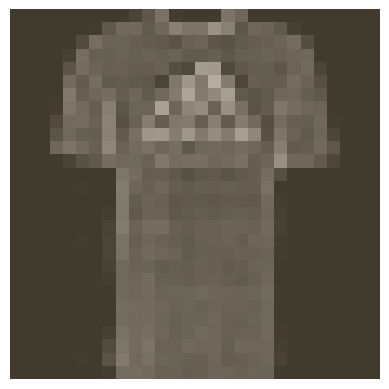

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
from torch import nn, optim
import torch.nn.functional as F

In [5]:
#  Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to first hidden layer linear transformation
        self.h1 = nn.Linear(784, 256)
        # Output from the first hidden layer as input to the second hidden layer linear transformation
        self.h2 = nn.Linear(256, 128)
        # Output from the second hidden layer as input to the third hidden layer linear transformation
        self.h3 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):

        # Pass the input tensor through each of our operations
        x = self.h1(x)
        x = self.relu(x)
        x = self.h2(x)
        x = self.relu(x)
        x = self.h3(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)

        ## Alternatively

        # x = F.relu(self.h1(x))
        # x = F.relu(self.h2(x))
        # x = F.relu(self.h3(x))
        # x = F.log_softmax(self.output(x), dim=1)
        
        return x



> **Alternatively**: Using `nn.Sequential`

In [6]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1)
                      )

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
# Create the network, define the criterion and optimizer
model = Network()
print(model)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.005)

Network(
  (h1): Linear(in_features=784, out_features=256, bias=True)
  (h2): Linear(in_features=256, out_features=128, bias=True)
  (h3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): LogSoftmax(dim=1)
)


> **Using `nn.Sequential`**

You only need to define the criterion and the optimizer and then you train the model

In [8]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.003)

In [9]:
# Train the network here
epochs = 30

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
            
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad() 

        pred = model(images)  #These are log probabilities
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5186495697860525
Training loss: 0.39479835725415235
Training loss: 0.36053543604576765
Training loss: 0.3320351767657535
Training loss: 0.31751951800861844
Training loss: 0.3042859693548318
Training loss: 0.29279298785684715
Training loss: 0.28753651518906864
Training loss: 0.27359937625462566
Training loss: 0.269123052510975
Training loss: 0.2614641616911268
Training loss: 0.2532712695345696
Training loss: 0.24484069160878785
Training loss: 0.24632961861789227
Training loss: 0.24063493959558035
Training loss: 0.2380177360742903
Training loss: 0.2270583089298086
Training loss: 0.23386586483305832
Training loss: 0.22080614494044642
Training loss: 0.21967388587549075
Training loss: 0.21476794866674237
Training loss: 0.21324051265666352
Training loss: 0.20803017252242006
Training loss: 0.20485500622389793
Training loss: 0.19843913017829726
Training loss: 0.19530179678821868
Training loss: 0.19189252420020764
Training loss: 0.18929501970820845
Training loss: 0.187844407744

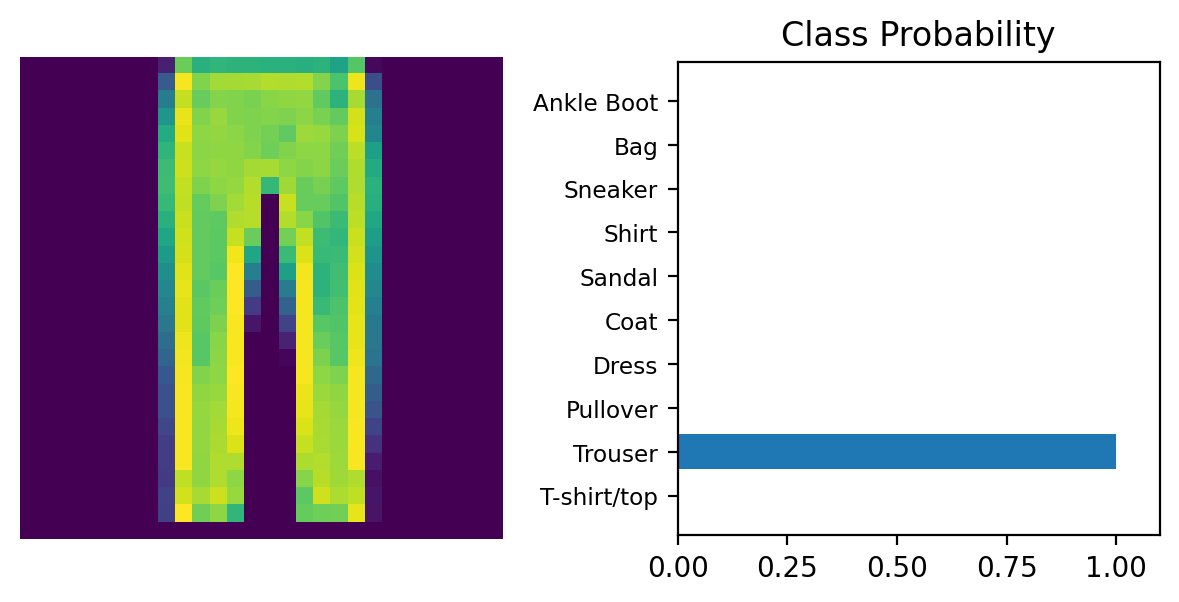

In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')